#### Import Libraries

In [726]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt 
import seaborn as sns
import regex as re
import numpy as np

In [727]:
# import all necessary dataset 
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
spray = pd.read_csv('./datasets/spray.csv')
weather = pd.read_csv('./datasets/weather.csv')

#### Change Header to Lowercase

In [728]:
# change columns for all dataframes to lowercase for easy reference
for df in [train, test, spray, weather]:
    df.columns = df.columns.str.lower()

#### Check for Null Values

All datasets are complete and has no null values except for the spray dataset. 

In [729]:
# check shape
spray.shape

(14835, 4)

In [730]:
# check null values
spray.isnull().sum()

date           0
time         584
latitude       0
longitude      0
dtype: int64

In [731]:
# fill all null values with blank
spray.fillna("", inplace=True)

The time columns in the spray dataset has a few null values we will replace them with blanks. 

#### Create functions for plotting graphs in EDA

In [732]:
# create a function for subplot histogram
def subplot_barplot(dataframe, list_of_columns, xlabels, ylabels, size):
    nrows = int(np.ceil(len(list_of_columns)/2)) # no. rows to populate 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=size) # plot subplot, state no. of columns, determine figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, create positions for subplots
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].barplot(dataframe[column], color='pink',edgecolor='violet') # feel free to add more settings
        ax[i].set_title(column)   # set graph title
        ax[i].set_xlabel(xlabels) # set x label
        ax[i].set_ylabel(ylabels) # set y label
        ax[i].set_ylim(0,2050) # set y axis to 2050 (representing total rows in dataframe)   
    if len(list_of_columns) % 2 == 1:  # Turn off odd number of subplots            
        ax[-1].axis('off')
    sns.set(font_scale=1)  
    plt.tight_layout() 

In [733]:
# create a function for subplot histogram
def subplot_histplot(dataframe, list_of_columns, xlabels, ylabels, size):
    nrows = int(np.ceil(len(list_of_columns)/2)) # no. rows to populate 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=size) # plot subplot, state no. of columns, determine figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, create positions for subplots
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], color='pink',edgecolor='violet') # feel free to add more settings
        ax[i].set_title(column)   # set graph title
        ax[i].set_xlabel(xlabels) # set x label
        ax[i].set_ylabel(ylabels) # set y label
        ax[i].set_ylim(0,2050) # set y axis to 2050 (representing total rows in dataframe)   
    if len(list_of_columns) % 2 == 1:  # Turn off odd number of subplots            
        ax[-1].axis('off')
    sns.set(font_scale=1)  
    plt.tight_layout() 

In [734]:
# create a function for subplot boxplot
def subplot_box(df, list_x_var, y_var,cols,size):
    nrows = int(np.ceil(len(list_x_var)/cols))
    fig, ax = plt.subplots(nrows=nrows, ncols=cols, figsize=size) 
    ax = ax.ravel()
    for i, column_x in enumerate(list_x_var):                  
        sns.boxplot(data=df, x=list_x_var[i], y=y_var , ax=ax[i])       # Plotting scatterplots
        ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)        # Set x ticks labels to a rotation of 90degrees
        ax[i].set_title(f'{y_var} by {list_x_var[i]}', fontsize = 14)           # Set titles
    if len(list_x_var) % cols == 1:                             
        ax[-1].axis('off')
    plt.tight_layout()

In [735]:
# create a function for subplot scatter plot
def subplot_scatter(df, list_of_columns_x, columns_y, xlabels, ylabels):
    nrows = int(np.ceil(len(list_of_columns_x)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 30)) # You'll want to specify your figsize
    ax = ax.ravel()
    for i, column_x in enumerate(list_of_columns_x):                  # Gives us an index and columns            
        sns.scatterplot(data=df,
             x=column_x, 
             y=columns_y,
             ax= ax[i])       # Plotting scatterplots      
        ax[i].set_title(f'Fig {i+1}.: {column_x}', fontsize = 15)           # Set titles     
        ax[i].set_xlabel(xlabels,fontsize = 15)          # Set xlabels   
        ax[i].set_ylabel(ylabels,fontsize = 15)
        ax[i].axvline(x=df[column_x].mean(), ls='--', linewidth=2, c='red')
    if len(list_of_columns_x) % 2 == 1:                             # Turn off odd number of subplots            
        ax[-1].axis('off')
    sns.set(font_scale=1)    # Set scale for plots                  
    plt.tight_layout()         # Move the plots so they don't overlap 

#### EDA: Train Dataset

In [736]:
train.head(3)

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


In [737]:
train.dtypes

date                       object
address                    object
species                    object
block                       int64
street                     object
trap                       object
addressnumberandstreet     object
latitude                  float64
longitude                 float64
addressaccuracy             int64
nummosquitos                int64
wnvpresent                  int64
dtype: object

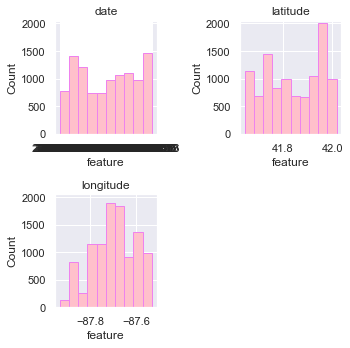

In [738]:
subplot_histplot(train, ['date','latitude','longitude'], 'feature', 'Count', (5,5))

In [739]:
train.describe()

,block,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [740]:
train['wnvpresent'].value_counts()

0    9955
1     551
Name: wnvpresent, dtype: int64

#### EDA: Weather dataset

In [741]:
# set display length for easy viewing
pd.options.display.max_rows=999
pd.options.display.max_columns=999

In [742]:
# view weather dataframe
weather.head(5)

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [743]:
# weather data types per columns
weather.dtypes

station          int64
date            object
tmax             int64
tmin             int64
tavg            object
depart          object
dewpoint         int64
wetbulb         object
heat            object
cool            object
sunrise         object
sunset          object
codesum         object
depth           object
water1          object
snowfall        object
preciptotal     object
stnpressure     object
sealevel        object
resultspeed    float64
resultdir        int64
avgspeed        object
dtype: object

There are many numerical columns that are categorized as object, we will dive deeper into the dataset to understand why this is so.

In [744]:
#  check columns with mismatched data type unique val|ues
weather['water1'].value_counts()

M    2944
Name: water1, dtype: int64

In [745]:
#  check columns with mismatched data type unique values
weather['snowfall'].value_counts()

M      1472
0.0    1459
  T      12
0.1       1
Name: snowfall, dtype: int64

In [746]:
#  check columns with mismatched data type unique values
weather['sunset'].value_counts().head(2)

-       1472
1931      96
Name: sunset, dtype: int64

After looking at columns whose datatype since to be mismatched,  we notice that there are 'M', 'T', '-' values in the dataset.   

- 'M' indicates missing data, as such we will be replacing 'M' with nan, a special number used to represent a nonexistent result. We will also be removing columns which are fully populated with 'M' (missing data).

- 'T' indicates Trace precipitation amount
- '-' indicates values not available for sunrise/sunset.

In [747]:
# non-numeric values in dataset
check_cols = weather[(weather=='M')|(weather=='  T')|(weather=='-')]

In [748]:
check_cols

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,-,-,NaN,M,M,M,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,-,-,NaN,M,M,M,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,-,-,NaN,M,M,M,NaN,NaN,NaN,NaN,NaN,NaN
2940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2941,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,-,-,NaN,M,M,M,T,NaN,NaN,NaN,NaN,NaN
2942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [749]:
check_cols.columns

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'depth',
       'water1', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')

In [750]:
for col_names in check_cols.columns:
    print(check_cols[col_names].value_counts())

Series([], Name: station, dtype: int64)
Series([], Name: date, dtype: int64)
Series([], Name: tmax, dtype: int64)
Series([], Name: tmin, dtype: int64)
M    11
Name: tavg, dtype: int64
M    1472
Name: depart, dtype: int64
Series([], Name: dewpoint, dtype: int64)
M    4
Name: wetbulb, dtype: int64
M    11
Name: heat, dtype: int64
M    11
Name: cool, dtype: int64
-    1472
Name: sunrise, dtype: int64
-    1472
Name: sunset, dtype: int64
Series([], Name: codesum, dtype: int64)
M    1472
Name: depth, dtype: int64
M    2944
Name: water1, dtype: int64
M      1472
  T      12
Name: snowfall, dtype: int64
  T    318
M        2
Name: preciptotal, dtype: int64
M    4
Name: stnpressure, dtype: int64
M    9
Name: sealevel, dtype: int64
Series([], Name: resultspeed, dtype: int64)
Series([], Name: resultdir, dtype: int64)
M    3
Name: avgspeed, dtype: int64


In [751]:
# drop water1 as it is empty
weather.drop('water1', axis=1, inplace=True)

In [752]:
# replace 'M' with numpy nan
weather.replace('M', np.nan, inplace = True)
weather.replace('-', np.nan, inplace = True)

In [753]:
# get dataframe shape 
weather.shape

(2944, 21)

In [754]:
# check for null values in weather
weather.isnull().sum()

station           0
date              0
tmax              0
tmin              0
tavg             11
depart         1472
dewpoint          0
wetbulb           4
heat             11
cool             11
sunrise        1472
sunset         1472
codesum           0
depth          1472
snowfall       1472
preciptotal       2
stnpressure       4
sealevel          9
resultspeed       0
resultdir         0
avgspeed          3
dtype: int64

##### Snowfall

In [755]:
# Snowfall
weather['snowfall'].value_counts()

0.0    1459
  T      12
0.1       1
Name: snowfall, dtype: int64

In [756]:
# Drop snowfall as it has highly imbalanced class
weather.drop('snowfall', axis=1, inplace=True)

##### Preciptotal

In [757]:
# Preciptotal
weather['preciptotal'].value_counts()

0.00    1577
  T      318
0.01     127
0.02      63
0.03      46
0.04      36
0.05      32
0.08      28
0.12      28
0.06      27
0.07      23
0.16      21
0.09      21
0.11      20
0.14      20
0.17      17
0.28      15
0.13      14
0.19      14
0.18      14
0.15      13
0.20      13
0.26      11
0.23      11
0.25      11
0.24      10
0.10      10
0.29       9
0.39       9
0.40       9
0.21       9
0.43       9
0.31       9
0.34       8
0.32       8
0.22       8
0.37       7
0.33       7
0.48       7
0.30       7
0.41       7
0.50       7
0.59       7
0.45       7
0.63       6
0.84       6
0.27       6
0.65       6
0.80       6
0.68       5
0.93       5
0.36       5
0.54       5
0.92       5
0.85       5
0.44       5
0.58       4
0.51       4
0.72       4
0.70       4
0.66       4
1.23       4
0.89       4
0.55       4
0.52       4
0.97       4
0.75       4
0.64       4
1.55       3
0.74       3
1.03       3
0.87       3
0.82       3
0.60       3
0.71       3
0.42       3
0.35       3

In [758]:
weather['preciptotal'].replace("  T", 0.005, inplace = True)

In [759]:
weather.dtypes

station          int64
date            object
tmax             int64
tmin             int64
tavg            object
depart          object
dewpoint         int64
wetbulb         object
heat            object
cool            object
sunrise         object
sunset          object
codesum         object
depth           object
preciptotal     object
stnpressure     object
sealevel        object
resultspeed    float64
resultdir        int64
avgspeed        object
dtype: object

In [760]:
weather.columns

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'depth',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed'],
      dtype='object')

#### EDA: Weather; split CodeSum to Weather Types

In [761]:
# get unique values in codesum
weather_types = weather['codesum'].unique()

# show unique weather types
all_weather_types = []
for i in weather_types:
    weather_code = re.findall(r'\w{2}\+*', i)
    all_weather_types += weather_code
    
# get unique weather code 
unique_weather_types = set(all_weather_types)
unique_weather_types

{'BC',
 'BR',
 'DZ',
 'FG',
 'FG+',
 'FU',
 'GR',
 'HZ',
 'MI',
 'RA',
 'SN',
 'SQ',
 'TS',
 'VC'}

split weather into 14 columns and return binary results

In [762]:
# create columns for unique_weather_types
for v in unique_weather_types:
    j = 0
    for codes in weather['codesum']:
        weather.loc[j,f'weathertype_{v}'] = (1 if  re.search(v,codes) is not None else 0)
        j += 1

#### EDA: date

In [763]:
weather['date'] = pd.to_datetime(weather['date'])

for df in [train, test, spray, weather]:
    df[['year', 'month', 'day']] = pd.DataFrame([ x.split('-') for x in df['date'].tolist() ])

In [764]:
pd.options.display.max_rows=999

In [765]:
weather

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,weathertype_VC,weathertype_FU,weathertype_GR,weathertype_FG,weathertype_SN,weathertype_FG+,weathertype_SQ,weathertype_MI,weathertype_BC,weathertype_RA,weathertype_TS,weathertype_HZ,weathertype_BR,weathertype_DZ
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,0.00,29.10,29.82,1.7,27,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2007-05-01,84,52,68,NaN,51,57,0,3,NaN,NaN,,NaN,0.00,29.18,29.82,2.7,25,9.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,0.00,29.38,30.09,13.0,4,13.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,2007-05-02,60,43,52,NaN,42,47,13,0,NaN,NaN,BR HZ,NaN,0.00,29.44,30.08,13.3,2,13.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,0.00,29.39,30.12,11.7,7,11.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45,NaN,34,42,20,0,NaN,NaN,,NaN,0.00,29.42,30.07,8.5,29,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2940,1,2014-10-30,51,32,42,-4,34,40,23,0,0622,1649,,0,0.00,29.34,30.09,5.1,24,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2941,2,2014-10-30,53,37,45,NaN,35,42,20,0,NaN,NaN,RA,NaN,0.005,29.41,30.10,5.9,23,6.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,0623,1647,RA SN,0,0.03,29.49,30.20,22.6,34,22.9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Merging Stations

The weather dataset provided daily weather data collected from 2 stations. We visually inspect the data from both stations.

In [766]:
weather.groupby('station').describe().T

station                          1            2
tmax            count  1472.000000  1472.000000
                mean     75.978940    76.353261
                std      11.503150    11.421482
                min      42.000000    41.000000
                25%      68.000000    69.000000
                50%      78.000000    78.000000
                75%      85.000000    85.000000
                max     103.000000   104.000000
tmin            count  1472.000000  1472.000000
                mean     56.730978    58.889946
                std      10.347907    10.306855
                min      29.000000    29.000000
                25%      49.000000    51.000000
                50%      58.000000    60.000000
                75%      65.000000    67.000000
                max      82.000000    83.000000
dewpoint        count  1472.000000  1472.000000
                mean     53.377717    53.538043
                std      10.670263    10.683121
                min      22.000000    23.000000
                25%      46.000000    46.000000
                50%      54.000000    55.000000
                75%      61.250000    62.000000
                max      75.000000    74.000000
resultspeed     count  1472.000000  1472.000000
                mean      6.987092     6.934239
                std       3.586353     3.589725
                min       0.100000     0.300000
                25%       4.400000     4.275000
                50%       6.400000     6.500000
                75%       9.100000     9.225000
                max      24.100000    21.700000
resultdir       count  1472.000000  1472.000000
                mean     17.656250    17.333560
                std      10.222077     9.903450
                min       1.000000     1.000000
                25%       7.000000     8.000000
                50%      19.500000    19.000000
                75%      26.000000    24.000000
                max      36.000000    36.000000
weathertype_VC  count  1472.000000  1472.000000
                mean      0.005435     0.010190
                std       0.073545     0.100465
                min       0.000000     0.000000
                25%       0.000000     0.000000
                50%       0.000000     0.000000
                75%       0.000000     0.000000
                max       1.000000     1.000000
weathertype_FU  count  1472.000000  1472.000000
                mean      0.003397     0.002717
                std       0.058202     0.052075
                min       0.000000     0.000000
                25%       0.000000     0.000000
                50%       0.000000     0.000000
                75%       0.000000     0.000000
                max       1.000000     1.000000
weathertype_GR  count  1472.000000  1472.000000
                mean      0.000000     0.000679
                std       0.000000     0.026064
                min       0.000000     0.000000
                25%       0.000000     0.000000
                50%       0.000000     0.000000
                75%       0.000000     0.000000
                max       0.000000     1.000000
weathertype_FG  count  1472.000000  1472.000000
                mean      0.015625     0.012228
                std       0.124062     0.109941
                min       0.000000     0.000000
                25%       0.000000     0.000000
                50%       0.000000     0.000000
                75%       0.000000     0.000000
                max       1.000000     1.000000
weathertype_SN  count  1472.000000  1472.000000
                mean      0.000679     0.003397
                std       0.026064     0.058202
                min       0.000000     0.000000
                25%       0.000000     0.000000
                50%       0.000000     0.000000
                75%       0.000000     0.000000
                max       1.000000     1.000000
weathertype_FG+ count  1472.000000  1472.000000
                mean      0.015625     0.012228
                

As the data from both stations are similar, we will be aggregating the results of the stations to get the general weather condition for the day. This is done in a few ways:

1) For numerical features, take the average of both stations

2) For numerical features with missing data, we impute missing data with the other station data on the same day.

3) For variables only captured in 1 station, we assume that the results will be the same for the other station.

4) For weather types, we assume that the weather type captured by either station will apply to the other station.

##### Impute missing numerical variables

In [767]:
numeric_features = ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']

In [768]:
weather[numeric_features].dtypes

tmax             int64
tmin             int64
tavg            object
dewpoint         int64
wetbulb         object
heat            object
cool            object
preciptotal     object
stnpressure     object
sealevel        object
resultspeed    float64
resultdir        int64
avgspeed        object
dtype: object

Some features have the wrong dtype due to the missing values.

In [769]:
# Convert null to the other station value & convert feature to float
for feature in numeric_features:
    if weather[feature].dtype == object:
        for row, col in weather[weather[feature].isnull()].iterrows():
            if weather.loc[row,'station'] == 1:
                weather.loc[row,feature] = weather.loc[row + 1,feature]
            else:
                weather.loc[row,feature] = weather.loc[row - 1, feature]
        weather[feature] = weather[feature].apply(float)

##### weather type

In [770]:
 weather_features= ['weathertype_VC',
                     'weathertype_FU',
                     'weathertype_GR',
                     'weathertype_FG',
                     'weathertype_SN',
                     'weathertype_FG+',
                     'weathertype_SQ',
                     'weathertype_MI',
                     'weathertype_BC',
                     'weathertype_RA',
                     'weathertype_TS',
                     'weathertype_HZ',
                     'weathertype_BR',
                     'weathertype_DZ',
                   ]

In [771]:
# weather type depends on weather type in either station
for weathertype in weather_features:
    for row, col in weather[weather_features].iterrows():
        if weather.loc[row,weathertype] == 1:
            if weather.loc[row,'station'] == 1:
                weather.loc[row + 1,weathertype] = weather.loc[row,weathertype]
            else:
                weather.loc[row - 1,weathertype] = weather.loc[row,weathertype]
        

##### Data captured by station 1 only

In [772]:
# This are the features captured by station 1 only
other_features = ['depart', 'sunrise', 'sunset', 'depth']

In [773]:
# We impute the null values with the data from station 1
for feat in other_features:
    weather[feat].fillna(method = 'ffill', inplace = True)

##### Combine both station data

In [774]:
weather_p = weather.groupby(pd.Grouper(key='date', freq = 'D')).mean()

In [775]:
weather_p.drop('station', axis =1, inplace = True)

In [776]:
weather_p

,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,weathertype_VC,weathertype_FU,weathertype_GR,weathertype_FG,weathertype_SN,weathertype_FG+,weathertype_SQ,weathertype_MI,weathertype_BC,weathertype_RA,weathertype_TS,weathertype_HZ,weathertype_BR,weathertype_DZ
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-05-01,83.5,51.0,67.5,51.0,56.5,0.0,2.5,0.0000,29.140,29.820,2.20,26.0,9.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-05-02,59.5,42.5,51.5,42.0,47.0,13.5,0.0,0.0000,29.410,30.085,13.15,3.0,13.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2007-05-03,66.5,47.0,57.0,40.0,49.0,8.0,0.0,0.0000,29.425,30.120,12.30,6.5,12.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2007-05-04,72.0,50.0,58.0,41.5,50.0,7.0,0.0,0.0025,29.335,30.045,10.25,7.5,10.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2007-05-05,66.0,53.5,60.0,38.5,49.5,5.0,0.0,0.0050,29.430,30.095,11.45,7.0,11.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-27,78.0,52.5,65.5,51.5,58.5,0.5,1.0,0.0100,28.960,29.665,12.35,19.0,13.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2014-10-28,67.0,46.5,57.0,39.0,47.5,8.0,0.0,0.0175,29.190,29.850,14.40,26.0,15.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2014-10-29,49.0,38.0,44.0,33.0,41.0,21.0,0.0,0.0000,29.390,30.065,9.00,29.0,9.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
